In [47]:
import numpy as np
import random
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

In [26]:
def generate_pi_range(K, n):
    cuts = np.zeros(K-1)
    for i in range(K-1):
        cuts[i] = random.randrange(0, n)
    pi_range = np.sort(cuts)
    pi_range = np.append(pi_range,n)
    for i in range(K-1,0, -1):
        pi_range[i] = int(pi_range[i] - pi_range[i-1])
    pi_range = [int(x) for x in pi_range]
    return pi_range

In [85]:
K = 5
p = 20
n = 100000
mu_interval = [-5, 5]
cov_interval = [-2, 2]

pi_range = generate_pi_range(K,n)
pi = [x/sum(pi_range) for x in pi_range]

sigma = np.random.random((K, p, p))*(cov_interval[1] - cov_interval[0])+cov_interval[0]
for i in range(K):
    sigma_i = sigma[i]
    sigma[i] = np.dot(sigma_i,sigma_i.transpose())

mu = np.random.random((K,p))*(mu_interval[1] - mu_interval[0]) + mu_interval[0]
data = []
data = np.zeros((n,p))

for i in range(K):
    mu_i = mu[i,:]
    sigma_i = sigma[i,:,:]
    rv = multivariate_normal(mean = mu_i, cov = sigma_i)
    start_index = sum(pi_range[:i])
    stop_index = sum(pi_range[:i+1])
    generated_data = np.array(rv.rvs(size = pi_range[i]))
    data[start_index:stop_index] = generated_data



[37603, 7044, 16267, 17399, 21687]
[0.37603, 0.07044, 0.16267, 0.17399, 0.21687]


In [60]:
print(sigma)
print(mu)

[[[1.92467118]]]
[[1.57704064]]


In [95]:
y_temp = np.zeros((n,K))

for i in range(K):
    mu_i = mu[i,:]
    sigma_i = sigma[i,:,:]
    rv = multivariate_normal.pdf(data, mean = mu_i, cov = sigma_i)
    y_temp[:,i] = rv
print(y_temp.shape)
print()

(100000, 5)


[1, 1]


In [3]:
import numpy as np
import random
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

In [4]:
def generate_pi_range(K, n):
    cuts = np.zeros(K-1)
    for i in range(K-1):
        cuts[i] = random.randrange(0, n)
    pi_range = np.sort(cuts)
    pi_range = np.append(pi_range,n)
    for i in range(K-1,0, -1):
        pi_range[i] = int(pi_range[i] - pi_range[i-1])
    pi_range = [int(x) for x in pi_range]
    return pi_range

In [790]:
def split(limits):
    p = limits.shape[0]
    feat = int(random.randrange(0,p))
    place = np.random.random(1)*(limits[feat,0] - limits[feat,1])+ limits[feat,1]
    
    new_limits_high = np.copy(limits)
    new_limits_high[feat,0] = place
    
    new_limits_low = np.copy(limits)
    new_limits_low[feat,1] = place
    
    size_low = 1
    size_high = 1
    for i in range(p):
        size_low = size_low*(new_limits_low[i,1] - new_limits_low[i,0])
        size_high = size_high*(new_limits_high[i,1] - new_limits_high[i,0])
    
    return new_limits_low, new_limits_high, feat, place, size_low, size_high
    

[27.86555768  5.79695824 63.4263858   3.3127771  18.77236693 53.15501153
 13.2776483   1.73871368  1.28797909  3.28376311  4.08283855]
100000
[14217.1212631   2957.63175367 32360.40091672  1690.19239611
  9577.7382301  27119.90384085  6774.310356     887.09881826
   657.13218967  1675.38934343  2083.0808921 ]


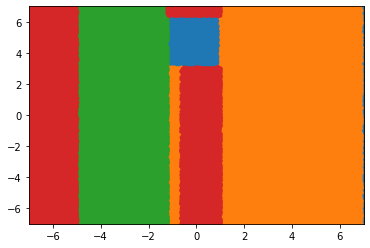

In [799]:
K = 3
p = 2
n = 100000
interval = [-7.0, 7.0]
intervals = np.array([interval for i in range(p)])

nr_splits = 10
splits = np.zeros((nr_splits,2))




all_limits = np.zeros((nr_splits + 1, p, 2))
all_limits[0,:,:] = intervals

sizes = np.zeros(nr_splits + 1)

pointer = 1

for i in range(nr_splits):
    j = int(random.randrange(0,pointer))
    base = all_limits[j,:,:]
    
    new_limits_low, new_limits_high, feat, place, size_low, size_high = split(base)
    splits[i,0] = place
    splits[i,1] = feat

    
    all_limits[j,:,:] = new_limits_low
    sizes[j] = size_low
    
    all_limits[pointer,:,:] = new_limits_high
    sizes[pointer] = size_high
    pointer += 1

    
    
split_ranges = np.ones(nr_splits + 1) * (n / (nr_splits+1))

print(sizes)

split_ranges = np.multiply(split_ranges, sizes)

split_ranges = split_ranges * (n/sum(split_ranges))
sum(split_ranges)
print(n)
print(split_ranges)



data = np.zeros((n,p))
classes = np.zeros((n,1))

data_pointer = 0
for k in range(nr_splits + 1):
    c = int(random.randrange(0,K+1))

    for i in range(int(split_ranges[k])+1):
        pnt = np.random.random(p)*(all_limits[k,:,0] - all_limits[k,:,1])+ all_limits[k,:,1]
        data[data_pointer + i,:] = pnt
        classes[data_pointer + i] = c
        
    data_pointer += int(split_ranges[k])

        

if(p == 2):
    """
    for i in range(nr_splits):
        if(int(splits[i,1]) == 0):
            splitlines = [np.ones(n)*splits[i][0], np.linspace(interval[0], interval[1], n)]
        else:
            splitlines = [np.linspace(interval[0], interval[1], n), np.ones(n)*splits[i][0]]
            
        plt.plot(splitlines[0], splitlines[1], color = 'black')
    """
    

    
    for i in range(K+1):
        indexes = np.argwhere(classes == i)[:,0]
        plt.plot(data[indexes,0], data[indexes,1],'.') 
        
    
    plt.xlim(interval)
    plt.ylim(interval)

In [524]:
K = 4
p = 5
n = 10000
interval = [-7.0, 7.0]
intervals = np.array([interval for i in range(p)])
print(intervals.shape[0])


nr_splits = 3
splits = np.zeros((nr_splits,2))
data = np.zeros((n,p))
classes = np.zeros((n,1))

for i in range(n):
    data[i,:] = np.random.random(p)*(intervals[:,0] - intervals[:,1])+ intervals[:,1]


coloured = np.zeros((n,1))

for i in range(nr_splits):
    feat = int(random.randrange(0,p))
    place = np.random.random(1)*(intervals[feat,0] - intervals[feat,1])+ intervals[feat,1]
    splits[i,0] = place
    splits[i,1] = feat

splits
    
    
for i in range(nr_splits):    
    c = int(random.randrange(0,K+1))
    side = int(random.randrange(0,2))
    place = splits[i,0]
    feat = int(splits[i,1])
    
    #side = 1 => the area above the curve is filled with points
    if side == 1:
        pnts = np.argwhere(data[:,feat] >= place)[:,0]
    elif side == 0:
        pnts = np.argwhere(data[:,feat] < place)[:,0]
          
    for j in pnts:
        if(coloured[j] == 0):
            classes[j] = c
            coloured[j] = 1

            
            
print(splits)
        



if(p == 2):
    for i in range(nr_splits):
        if(int(splits[i,1]) == 0):
            splitlines = [np.ones(n)*splits[i][0], np.linspace(interval[0], interval[1], n)]
        else:
            splitlines = [np.linspace(interval[0], interval[1], n), np.ones(n)*splits[i][0]]
            
        plt.plot(splitlines[0], splitlines[1], color = 'black')

    
    #plt.plot(data[:,0], data[:,1], '.')
    
    for i in range(K+1):
        indexes = np.argwhere(classes == i)[:,0]
        plt.plot(data[indexes,0], data[indexes,1],'.') 
        
    
    plt.xlim(interval)
    plt.ylim(interval)
  

5
[[-6.79644684  0.        ]
 [ 1.83162555  2.        ]
 [-0.89991092  4.        ]]
